# Basal ganglia simulation. Scaffold model of the mouse striatum

This notebook gives an example of setting up a simulation of biologically realistic neural network of the mouse striatum. Striatum is the main input structure of the basal ganglia, subcortical structures involved in a variety of cognitive, emotional, and movement-related functions.

Simulation is performed using Python-based software *Snudda* (https://github.com/Hjorthmedh/Snudda) originally developed as a platform for the models of the basal ganglia nuclei (Hjorth et al., 2020). A striatal volume is populated with reconstructed neuronal morphologies with appropriate cell densities, and then we connect neurons together based on appositions between neurites as possible synapses and constrain them further, i.e. prune, with available connectivity data. It continues study of the striatal microcircuit by Du et al. (2017) and Lindroos et al. (2018).

## References

1. Hjorth J, Kozlov A, Carannante I, Frost Nylén J, Lindroos R, Johansson Y, Tokarska A, Dorst MC, Suryanarayana SM, Silberberg G, Hellgren Kotaleski J, Grillner S (2020) The microcircuits of striatum in silico. *Proc Natl Acad Sci U S A* (in press).

2. Lindroos R, Dorst MC, Du K, Filipovic M, Keller D, Ketzef M, Kozlov AK, Kumar A, Lindahl M, Nair AG, Perez-Fernandez J, Grillner S, Silberberg G, Hellgren Kotaleski J (2018) Basal Ganglia Neuromodulation Over Multiple Temporal and Structural Scales-Simulations of Direct Pathway MSNs Investigate the Fast Onset of Dopaminergic Effects and Predict the Role of Kv4.2. *Front Neural Circuits*, 12:3, eCollection 2018. DOI: [10.3389/fncir.2018.00003](https://doi.org/10.3389/fncir.2018.00003).

3. Du K, Wu YW, Lindroos R, Liu Y, Rózsa B, Katona G, Ding JB, Kotaleski JH (2017) Cell-type-specific inhibition of the dendritic plateau potential in striatal spiny projection neurons. *Proc Natl Acad Sci U S A*, 114(36):E7612-E7621. Epub 2017 Aug 21. DOI: [10.1073/pnas.1704893114](https://doi.org/10.1073/pnas.1704893114).

## Setting up the simulation environment

During execution of this example, *Snudda* will be downloaded from *GitHub.com* and installed locally in the user's home directory. *Linux* operating system with *bash* shell is assumed throughout the notebook. 

Make sure the search path includes directory `/home/$USER/.local/bin` and *Neuron* simulator is available:

In [1]:
!echo $PATH | grep -q "$HOME/.local/bin" && echo .local/bin OK || echo .local/bin FAILED
!which nrnivmodl >/dev/null && echo Neuron OK || echo Neuron FAILED
!python3 -c 'import neuron' && echo PyNeuron OK || echo PyNeuron FAILED

.local/bin OK
Neuron OK
PyNeuron OK


It is recommended to execute this notebook in a dedicated directory, which can be safely deleted afterwards. Check the current working directory and its contents.

In [2]:
!pwd
!ls -lA

/home/akozlov/tmp
total 32
drwxr-xr-x 2 akozlov users  4096 Mar 26 21:54 .ipynb_checkpoints
drwxr-xr-x 6 akozlov users  4096 Mar 26 21:54 Snudda
-rw-r--r-- 1 akozlov users 17694 Mar 26 21:54 StriatumScaffoldExample-tiny.ipynb
drwxr-xr-x 2 akozlov users  4096 Mar 26 19:44 x86_64


Clean up the files, if any, and download *Snudda*. This cell can be omitted or commented out in a subsequent run.

In [3]:
!rm -rf Snudda .ipynb_checkpoints
!git clone https://github.com/Hjorthmedh/Snudda.git

Cloning into 'Snudda'...
remote: Enumerating objects: 452, done.
remote: Counting objects: 100% (452/452), done.
remote: Compressing objects: 100% (203/203), done.
remote: Total 5160 (delta 253), reused 374 (delta 194), pack-reused 4708
Receiving objects: 100% (5160/5160), 218.26 MiB | 12.72 MiB/s, done.
Resolving deltas: 100% (3635/3635), done.


In [4]:
cd Snudda

/home/akozlov/tmp/Snudda


Install *Snudda* with its dependencies. New Python packages will be placed in the user's `$HOME/.local` directory.

In [5]:
!pip3 install --upgrade -e .[dev]

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///home/akozlov/tmp/Snudda


  Attempting uninstall: snudda
    Found existing installation: snudda 0.0.1b0
    Uninstalling snudda-0.0.1b0:
      Successfully uninstalled snudda-0.0.1b0
  Running setup.py develop for snudda


## Simulate the network

Set up striatal network of 100 neurons. This writes the configuration file `network-config.json` (see the last line of the output). Option `--overwrite` allows to overwrite the network's directory if it exists.

In [6]:
!snudda init networks/tinySim --size 100 --overwrite 

Creating config file
Network path: networks/tinySim
Creating missing directory networks/tinySim
CreateConfig
Using 1 functional channels
Adding Striatum with 100 neurons
Using cube for striatum
Creating cube mesh
File: networks/tinySim/mesh/Striatum-cube-mesh-0.00010749824478388102.obj
Centre: [0.00354  0.004645 0.005081]
Side: 0.00010749824478388102
Description: Striatum cube mesh, centre = [0.00354  0.004645 0.005081], side = 0.00010749824478388102
Adding neurons: FSN from dir /home/akozlov/tmp/Snudda/snudda/data/cellspecs/fs
Adding neurons: dSPN from dir /home/akozlov/tmp/Snudda/snudda/data/cellspecs/dspn
Adding neurons: iSPN from dir /home/akozlov/tmp/Snudda/snudda/data/cellspecs/ispn
Adding neurons: ChIN from dir /home/akozlov/tmp/Snudda/snudda/data/cellspecs/chin
Checking boundaries, to make sure P is not too high
LTS axon density P([-0.0002],[-0.0001],[-3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002],[-0.0001],[3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002],[0

Place the neurons based on the network config file. Positions are written to the file `network-neuron-positions.hdf5`.

In [7]:
!snudda place networks/tinySim

Placing neurons
Network path: networks/tinySim
Creating missing directory networks/tinySim/log
Using runID = 1
Using hdf5 version: latest
Parsing configuration file networks/tinySim/network-config.json
Using meshBinWidth 0.00010749824478388102
Cube mesh, switching to serial processing.
No mesh cache file found (networks/tinySim/mesh/Striatum-cube-mesh-0.00010749824478388102.obj-107-cache.pickle)
Running in serial
Voxel mask: 5x5x5
Processing x = 0
Processing x = 1
Processing x = 2
Processing x = 3
Processing x = 4
Fraction of border voxels: 0.0
Saving mesh cache file networks/tinySim/mesh/Striatum-cube-mesh-0.00010749824478388102.obj-107-cache.pickle
Calculation time: 0.011957393995544408 s
Setup voxel list
Setup place neurons
Update padding mask
Regenerating new random pool
Setup done
Inner voxel bin volume: 0.0 mm³
Using dimensions from config file
Adding: 1 FSN_1
No cache file found.
Saving cache file: /home/akozlov/tmp/Snudda/snudda/data/cellspecs/fs/str-fs-e180418_FS5-mMTC251001A-

Detect the apposition points where axons and dendrites of different neurons overlap.  
**NOTE**: this takes about 10 minutes on a common desktop.

In [8]:
!snudda detect networks/tinySim

Touch detection
Network path: networks/tinySim
Creating missing directory networks/tinySim/voxels
Using runID = 2
Already have a log file setup, ignoring
Using hdf5 driver version: latest
{'total': 8024164, 'free': 6513544, 'used': 1510620}
Each hyper voxel has 100 x 100 x 100 voxels
Touch detecting all volumes
Loading from networks/tinySim/network-config.json
Reading prototype for: FSN_1
Found cache file: /home/akozlov/tmp/Snudda/snudda/data/cellspecs/fs/str-fs-e180418_FS5-mMTC251001A-IDB-v20190301/MTC251001A-IDB-cor-rep-cache.pickle
Reading prototype for: dSPN_0
Found cache file: /home/akozlov/tmp/Snudda/snudda/data/cellspecs/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20190508/WT-0728MSN01-cor-rep-ax-cache.pickle
Reading prototype for: dSPN_1
Found cache file: /home/akozlov/tmp/Snudda/snudda/data/cellspecs/dspn/str-dspn-e150917_c10_D1-mWT-P270-20-v20190521/WT-P270-20-15ak-cor-cache.pickle
Reading prototype for: dSPN_2
Found cache file: /home/akozlov/tmp/Snudda/snudda/data/cellspecs/d

Wrote hyper voxel 4 (169 synapses, 0 gap junctions)
HyperID 4 completed - 169 synapses and 0 gap junctions found (18.68372990199714s)
Processing hyper voxel : 20/80 (62 neurons)
Bounding box appears to be outside hyper voxel
Placing 40727 random axon points for ChIN_0(cached)
nPoints = 40727
placeSynapsesNoAxonSphere: 0.03310986600263277s, hyperID: 20
Create lookup table
detectSynapses: 130 took 0.01159953000023961s
Create lookup table
detectGapJunctions: 0.013690537998627406s
Wrote hyper voxel 20 (130 synapses, 0 gap junctions)
HyperID 20 completed - 130 synapses and 0 gap junctions found (16.43644295100239s)
Processing hyper voxel : 26/80 (51 neurons)
Placing 40727 random axon points for ChIN_0(cached)
nPoints = 40727
placeSynapsesNoAxonSphere: 0.06530596199445426s, hyperID: 26
Create lookup table
detectSynapses: 24 took 0.007035928007098846s
Create lookup table
detectGapJunctions: 0.0068574390024878085s
Wrote hyper voxel 26 (24 synapses, 0 gap junctions)
HyperID 26 completed - 24 sy

Processing hyper voxel : 33/80 (1 neurons)
Create lookup table
detectSynapses: 0 took 0.005748461997427512s
Create lookup table
detectGapJunctions: 0.003165382004226558s
Wrote hyper voxel 33 (0 synapses, 0 gap junctions)
HyperID 33 completed - 0 synapses and 0 gap junctions found (0.3562918030002038s)
Processing hyper voxel : 42/80 (1 neurons)
Placing 40727 random axon points for ChIN_0(cached)
nPoints = 40727
placeSynapsesNoAxonSphere: 0.025282456997956615s, hyperID: 42
Create lookup table
detectSynapses: 0 took 0.006140559999039397s
Create lookup table
detectGapJunctions: 0.003175418001774233s
Wrote hyper voxel 42 (0 synapses, 0 gap junctions)
HyperID 42 completed - 0 synapses and 0 gap junctions found (0.1558570109991706s)
Processing hyper voxel : 50/80 (1 neurons)
Placing 40727 random axon points for ChIN_0(cached)
nPoints = 40727
placeSynapsesNoAxonSphere: 0.027885289993719198s, hyperID: 50
Create lookup table
detectSynapses: 0 took 0.005959585003438406s
Create lookup table
detect

Prune the detected appositions to get the set of synapses.

In [9]:
!snudda prune networks/tinySim

Prune synapses
Network path: networks/tinySim
Using runID = 3
preMergeOnly : False
Setting random seed: None
Using hdf5 driver sec2, latest version
Opening work history file: networks/tinySim/log/network-detect-worklog.hdf5
/home/akozlov/tmp/Snudda/snudda/prune.py:352: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.SlurmID = self.histFile["meta/SlurmID"].value
/home/akozlov/tmp/Snudda/snudda/prune.py:353: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.hyperVoxelIDs = self.histFile["meta/hyperVoxelIDs"].value
/home/akozlov/tmp/Snudda/snudda/prune.py:354: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.allHyperIDs = self.histFile["allHyperIDs"].value
/home/akozlov/tmp/Snudda/snudda/prune.py:355: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.voxelSize = self.histFile["meta/voxelSize"].value
/home/akozlov/tmp/Snudda/

Number of synapses removed where synapse connection not allowed: 0
Number of synapses removed due to distance dependent pruning: 31096
Number of synapses removed randomly: 78090
Number of synapses removed due to too many synapses between connected pair: 859
Number of synapses removed due to too few synapses between connected pairs: 5255
Number of synapses removed where all synapses between pairs are removed: 1901
pruneSynapses called.
pruneSynapses: No gapJunctions skipping pruning
/home/akozlov/tmp/Snudda/snudda/prune.py:248: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  nSynBefore = np.sum(self.histFile["nSynapses"].value)
/home/akozlov/tmp/Snudda/snudda/prune.py:251: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  nOverflow = np.sum(self.histFile["voxelOverflowCounter"].value)
/home/akozlov/tmp/Snudda/snudda/prune.py:252: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
 

Generate external input events for the network. A 1 second duration of the simulation is reserved.

In [10]:
!snudda input networks/tinySim --input snudda/data/config/input-tinytest-v6.json --time 1.0

Setting up inputs, assuming input.json exists
Using runID = 4
Writing input spikes to networks/tinySim/input-spikes.hdf5
Time = 1.0
Setting random seed: None
Using hdf5 version latest
Loading HDF5-file: networks/tinySim/network-pruned-synapses.hdf5
/home/akozlov/tmp/Snudda/snudda/input.py:1071: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.networkConfigFile = f["meta"]["configFile"].value
/home/akozlov/tmp/Snudda/snudda/input.py:1072: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.positionFile = f["meta"]["positionFile"].value
/home/akozlov/tmp/Snudda/snudda/input.py:1073: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.networkSlurmID = int(f["meta/SlurmID"].value)
/home/akozlov/tmp/Snudda/snudda/input.py:1075: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.axonStumpIDFlag = f["meta/axonStumpIDFlag"].value
Loadin

Gathering 22 - Thalamic
Generating 132 inputs for iSPN_3
Gathering 23 - CorticalBase
Generating 164 inputs for iSPN_3
Gathering 23 - CorticalSignal
Generating 76 inputs for iSPN_3
Gathering 23 - Thalamic
Generating 146 inputs for dSPN_2
Gathering 24 - CorticalBase
Generating 171 inputs for dSPN_2
Gathering 24 - CorticalSignal
Generating 122 inputs for dSPN_2
Gathering 24 - Thalamic
Generating 218 inputs for dSPN_3
Gathering 25 - CorticalBase
Generating 224 inputs for dSPN_3
Gathering 25 - CorticalSignal
Generating 138 inputs for dSPN_3
Gathering 25 - Thalamic
Generating 177 inputs for iSPN_1
Gathering 26 - CorticalBase
Generating 185 inputs for iSPN_1
Gathering 26 - CorticalSignal
Generating 88 inputs for iSPN_1
Gathering 26 - Thalamic
Generating 223 inputs for iSPN_2
Gathering 27 - CorticalBase
Generating 207 inputs for iSPN_2
Gathering 27 - CorticalSignal
Generating 137 inputs for iSPN_2
Gathering 27 - Thalamic
Generating 176 inputs for dSPN_2
Gathering 28 - CorticalBase
Generating 1

Gathering 69 - Thalamic
Generating 127 inputs for iSPN_3
Gathering 70 - CorticalBase
Generating 138 inputs for iSPN_3
Gathering 70 - CorticalSignal
Generating 79 inputs for iSPN_3
Gathering 70 - Thalamic
Generating 171 inputs for dSPN_2
Gathering 71 - CorticalBase
Generating 150 inputs for dSPN_2
Gathering 71 - CorticalSignal
Generating 99 inputs for dSPN_2
Gathering 71 - Thalamic
Generating 198 inputs for dSPN_1
Gathering 72 - CorticalBase
Generating 198 inputs for dSPN_1
Gathering 72 - CorticalSignal
Generating 114 inputs for dSPN_1
Gathering 72 - Thalamic
Generating 162 inputs for dSPN_2
Gathering 73 - CorticalBase
Generating 149 inputs for dSPN_2
Gathering 73 - CorticalSignal
Generating 100 inputs for dSPN_2
Gathering 73 - Thalamic
Generating 177 inputs for dSPN_1
Gathering 74 - CorticalBase
Generating 192 inputs for dSPN_1
Gathering 74 - CorticalSignal
Generating 121 inputs for dSPN_1
Gathering 74 - Thalamic
Generating 153 inputs for dSPN_2
Gathering 75 - CorticalBase
Generating 1

Compile the mechanisms definitions in *NMODL* format for *Neuron*.

In [11]:
!nrnivmodl snudda/data/cellspecs/mechanisms

Creating x86_64 directory for .o files.

/home/akozlov/tmp/Snudda
ls: cannot access 'snudda/data/cellspecs/mechanisms/*.inc': No such file or directory
snudda/data/cellspecs/mechanisms/Kv3_ch.mod snudda/data/cellspecs/mechanisms/bk_ch.mod snudda/data/cellspecs/mechanisms/bk_fs.mod snudda/data/cellspecs/mechanisms/bk_ms.mod snudda/data/cellspecs/mechanisms/ca_ch.mod snudda/data/cellspecs/mechanisms/cadyn_fs.mod snudda/data/cellspecs/mechanisms/cadyn_ms.mod snudda/data/cellspecs/mechanisms/cal12_ms.mod snudda/data/cellspecs/mechanisms/cal13_ms.mod snudda/data/cellspecs/mechanisms/cal_ch.mod snudda/data/cellspecs/mechanisms/caldyn_ms.mod snudda/data/cellspecs/mechanisms/can_fs.mod snudda/data/cellspecs/mechanisms/can_ms.mod snudda/data/cellspecs/mechanisms/cap_ch.mod snudda/data/cellspecs/mechanisms/caq_fs.mod snudda/data/cellspecs/mechanisms/caq_ms.mod snudda/data/cellspecs/mechanisms/car_fs.mod snudda/data/cellspecs/mechanisms/car_ms.mod snudda/data/cellspecs/mechanisms/cat32_ms.mod snu

libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/include/nrn -I/usr/lib -O2 -pipe -mtune=native -c can_fs.c  -fPIC -DPIC -o .libs/can_fs.o
"/usr/bin/nocmodl" can_ms
Translating can_ms.mod into can_ms.c
Thread Safe
"/usr/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/include/nrn" -I"/usr/lib"      -O2 -pipe -mtune=native -c -o can_ms.lo can_ms.c
libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/include/nrn -I/usr/lib -O2 -pipe -mtune=native -c can_ms.c  -fPIC -DPIC -o .libs/can_ms.o
"/usr/bin/nocmodl" cap_ch
Translating cap_ch.mod into cap_ch.c
Notice: Assignment to the GLOBAL variable, "mtau", is not thread safe
Notice: Assignment to the GLOBAL variable, "minf", is not thread safe
"/usr/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/include/nrn" -I"/usr/lib"      -O2 -pipe -mtune=native -c -o cap_ch.lo cap_ch.c
"/usr/bin/nocmodl" caq_fs
Translating caq_fs.mod into caq_fs.c
Thread Safe
"/usr/share/nrn

"/usr/bin/nocmodl" kir2_ch
Translating kir2_ch.mod into kir2_ch.c
Thread Safe
"/usr/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/include/nrn" -I"/usr/lib"      -O2 -pipe -mtune=native -c -o kir2_ch.lo kir2_ch.c
"/usr/bin/nocmodl" kir_fs
libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/include/nrn -I/usr/lib -O2 -pipe -mtune=native -c kir2_ch.c  -fPIC -DPIC -o .libs/kir2_ch.o
Translating kir_fs.mod into kir_fs.c
Thread Safe
"/usr/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/include/nrn" -I"/usr/lib"      -O2 -pipe -mtune=native -c -o kir_fs.lo kir_fs.c
"/usr/bin/nocmodl" kir_ms
Translating kir_ms.mod into kir_ms.c
Thread Safe
"/usr/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/include/nrn" -I"/usr/lib"      -O2 -pipe -mtune=native -c -o kir_ms.lo kir_ms.c
libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/include/nrn -I/usr/lib -O2 -pipe -mtune=native -c kir_ms.

libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/include/nrn -I/usr/lib -O2 -pipe -mtune=native -c vecevent.c  -fPIC -DPIC -o .libs/vecevent.o
"/usr/share/nrn/libtool" --tag=CC --mode=link mpicc -module  -O2 -pipe -mtune=native    -o libnrnmech.la -rpath "/usr/lib"  Kv3_ch.lo bk_ch.lo bk_fs.lo bk_ms.lo ca_ch.lo cadyn_fs.lo cadyn_ms.lo cal12_ms.lo cal13_ms.lo cal_ch.lo caldyn_ms.lo can_fs.lo can_ms.lo cap_ch.lo caq_fs.lo caq_ms.lo car_fs.lo car_ms.lo cat32_ms.lo cat33_ms.lo h_lts.lo hcn12_ch.lo im_lts.lo it_lts.lo kaf_fs.lo kaf_ms.lo kas_fs.lo kas_ms.lo kcnq_ch.lo kdr_fs.lo kdr_ms.lo kdrbca1_lts.lo kir2_ch.lo kir_fs.lo kir_ms.lo kv2_ch.lo kv4_ch.lo na2_ch.lo na3n_lts.lo na_ch.lo naf_fs.lo naf_ms.lo par_ggap.lo sk_ch.lo sk_fs.lo sk_ms.lo tmampa.lo tmgabaa.lo tmglut.lo tmnmda.lo vecevent.lo mod_func.lo  -L"/usr/lib" -lnrnoc -loc -lmemacs -lnrnmpi -lscopmath -lsparse13 -lreadline -lncursesw -L"/usr/lib" -lnrniv -livoc -lneuron_gnu -lmeschach -lsundials       -lm -ldl
libtool: link:

Run the simulation. Option `--time` defines duration of the simulation, in seconds. It can't be longer than the duration of the external input reserved above. Try 100 milliseconds for a very short simulation.  
**NOTE**: this takes about 15 minutes on a common desktop.

In [12]:
!snudda simulate networks/tinySim/ --time 0.1 --input networks/tinySim/input-spikes.hdf5 --voltOut networks/tinySim/simulation/volt.txt

Creating missing directory networks/tinySim/simulation
Using input file networks/tinySim/input-spikes.hdf5
args: Namespace(action='simulate', cont=False, disableGJ=False, h5legacy=False, hvsize=None, input='networks/tinySim/input-spikes.hdf5', inputFile=None, mechDir=None, mergeonly=False, nchannels=1, networkFile=None, overwrite=False, path='networks/tinySim', profile=False, size=None, spikesOut=None, time=0.1, verbose=False, voltOut='networks/tinySim/simulation/volt.txt', volumeID=None)
Using networkFile: networks/tinySim/network-pruned-synapses.hdf5
Using inputFile: networks/tinySim/input-spikes.hdf5
Using logFile: networks/tinySim/log/network-simulation-log.txt
Creating save/traces
Worker 0: Loading network from networks/tinySim/network-pruned-synapses.hdf5
Loading networks/tinySim/network-pruned-synapses.hdf5
Loading config data from HDF5
/home/akozlov/tmp/Snudda/snudda/load.py:53: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  data["config"]

Neuron dSPN_0 resting voltage = -86
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 34 iSPN_0
Neuron iSPN_0 resting voltage = -83
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 35 dSPN_3
Neuron dSPN_3 resting voltage = -86
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 36 iSPN_2
Neuron iSPN_2 resting voltage = -86
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 37 dSPN_1
Neuron dSPN_1 resting voltage = -87
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 38 iSPN_1
Neuron iSPN_1 resting voltage = -83
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 39 dSPN_3
Neuron dSPN_3 resting voltage = -86
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 40 iSPN_1
Neuron iSPN_1 resting voltage = -83
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 41 dSPN_2
Neuron dSPN_2 resting voltage = -86
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 42 dSPN_0
N

Running simulation for 0.1 s
1% done. Elapsed: 3.8 s, estimated time left: 377.5 s
2% done. Elapsed: 7.3 s, estimated time left: 357.7 s
3% done. Elapsed: 10.8 s, estimated time left: 348.8 s
4% done. Elapsed: 14.3 s, estimated time left: 342.4 s
5% done. Elapsed: 17.8 s, estimated time left: 337.5 s
6% done. Elapsed: 21.2 s, estimated time left: 332.8 s
7% done. Elapsed: 24.7 s, estimated time left: 328.5 s
8% done. Elapsed: 28.2 s, estimated time left: 324.4 s
9% done. Elapsed: 31.7 s, estimated time left: 320.5 s
10% done. Elapsed: 35.2 s, estimated time left: 316.7 s
11% done. Elapsed: 38.7 s, estimated time left: 312.9 s
12% done. Elapsed: 42.2 s, estimated time left: 309.1 s
13% done. Elapsed: 45.6 s, estimated time left: 305.5 s
14% done. Elapsed: 49.1 s, estimated time left: 301.8 s
15% done. Elapsed: 52.6 s, estimated time left: 298.2 s
16% done. Elapsed: 56.1 s, estimated time left: 294.7 s
17% done. Elapsed: 59.6 s, estimated time left: 291.1 s
18% done. Elapsed: 63.1 s, est

## Plot simulation results

In [13]:
%matplotlib inline

See the spike raster plot for all cell types.

Loading networks/tinySim/network-pruned-synapses.hdf5
Loading config data from HDF5
99 neurons with 6948 synapses and 10000 gap junctions
Load done. 0.032892531002289616
Sort the traces
Sort the traces


/home/akozlov/tmp/Snudda/snudda/load.py:53: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  data["config"] = f["config"].value
/home/akozlov/tmp/Snudda/snudda/load.py:54: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.config = json.loads(f["config"].value)
/home/akozlov/tmp/Snudda/snudda/load.py:81: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  * f["meta/voxelSize"].value \
/home/akozlov/tmp/Snudda/snudda/load.py:82: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  + f["meta/simulationOrigo"].value
/home/akozlov/tmp/Snudda/snudda/load.py:103: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  configFile = f["meta/configFile"].value
/home/akozlov/tmp/Snudda/snudda/load.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  positionFile = f["meta/positionFile

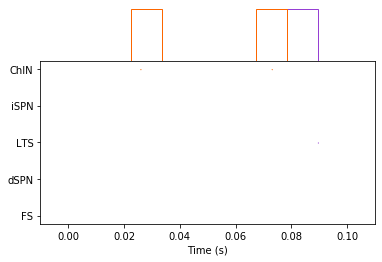

<Figure size 432x288 with 0 Axes>

Saving networks/tinySim/figs/network-output-spikes-666-colour.png


<Figure size 432x288 with 0 Axes>

In [14]:
from snudda.plotting.Network_plot_spike_raster import NetworkPlotSpikeRaster

fileName = "networks/tinySim/simulation/network-output-spikes-666.txt"
networkFile = "networks/tinySim/network-pruned-synapses.hdf5"
endTime = 0.1
npsr = NetworkPlotSpikeRaster(fileName,networkFile,skipTime=0.0,
                                  endTime=endTime,
                                  typeOrder=["FSN","dSPN","LTS","iSPN","ChIN"])

Check voltage traces for randomly the selected cells.

Unable to guess ID, using 666.
Loading networks/tinySim/network-pruned-synapses.hdf5
Loading config data from HDF5
99 neurons with 6948 synapses and 10000 gap junctions
Load done. 0.02653060800366802
!!! Excluding first 0s from the plot
Plotting traces: [1, 2, 7, 10, 15]
Plotted 5 traces (total 99)


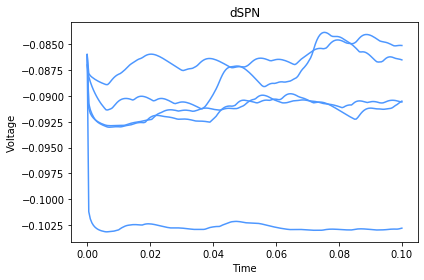

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-dSPN-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [0, 3, 4, 5, 6]
Plotted 5 traces (total 99)


<Figure size 432x288 with 0 Axes>

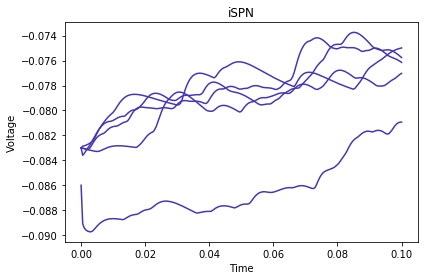

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-iSPN-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [12]
Plotted 1 traces (total 99)


<Figure size 432x288 with 0 Axes>

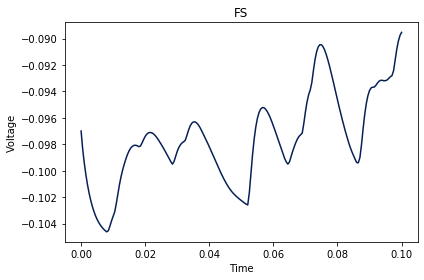

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-FSN-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [81]
Plotted 1 traces (total 99)


<Figure size 432x288 with 0 Axes>

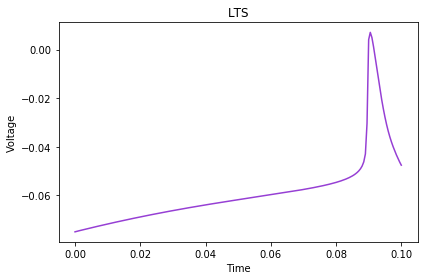

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-LTS-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [98]
Plotted 1 traces (total 99)


<Figure size 432x288 with 0 Axes>

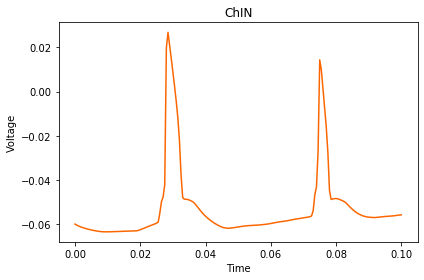

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-ChIN-colour.png


<Figure size 432x288 with 0 Axes>

In [15]:
from snudda.plotting.Network_plot_traces import NetworkPlotTraces

plotOffset = 0
skipTime = 0
nTracesMax = 5

fileName = "networks/tinySim/simulation/volt.txt"
npt = NetworkPlotTraces(fileName,networkFile)
networkFile = "networks/tinySim/network-pruned-synapses.hdf5"
    
npt.plotTraceNeuronType(neuronType="dSPN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="iSPN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="FSN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="LTS",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="ChIN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)


Analyze spatial distribution of the synapses for each cell type.

Loading networks/tinySim/network-pruned-synapses.hdf5
Assuming volume type: cube[cube or full]
Only using 20000neurons of the connection data
Loading networks/tinySim/network-pruned-synapses.hdf5
Loading config data from HDF5
99 neurons with 6948 synapses and 10000 gap junctions
Load done. 0.02333179300330812
Number of neurons: 99
Synapse row 0 - 0.0 % time: 0.00165488499624189 seconds
Created connection matrix 0.013890643997001462 seconds
GJ row : 0 - 0.0 %  time : 0.0006943620028323494 seconds
Created gap junction connection matrix 0.03743032900092658 seconds
Creating population dictionary
Done.
!!! Setting sideLen to None
Calculating synapse distance histogram
Creating dist histogram
nSynapses = 6948, at 0
Created distance histogram (optimised) in 0.014336699001432862 seconds
Saving cache to networks/tinySim/network-pruned-synapses.hdf5-cache
Plotting connection probability dSPN to iSPN (synapses)
Centering in None : Keeping 48/48
Counting connections


/home/akozlov/tmp/Snudda/snudda/load.py:53: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  data["config"] = f["config"].value
/home/akozlov/tmp/Snudda/snudda/load.py:54: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.config = json.loads(f["config"].value)
/home/akozlov/tmp/Snudda/snudda/load.py:103: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  configFile = f["meta/configFile"].value
/home/akozlov/tmp/Snudda/snudda/load.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  positionFile = f["meta/positionFile"].value
/home/akozlov/tmp/Snudda/snudda/load.py:117: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  if(type(f["meta/SlurmID"].value) == bytes):
/home/akozlov/tmp/Snudda/snudda/load.py:120: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  data["Slu

Requested: 10000000.0 calculated [2070.]
Rejected (too large z-depth): 234
P(d<5e-05)=0.07948717948717948
P(d<0.0001)=0.06682808716707021


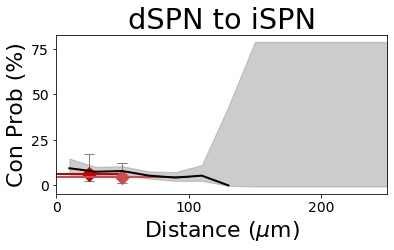

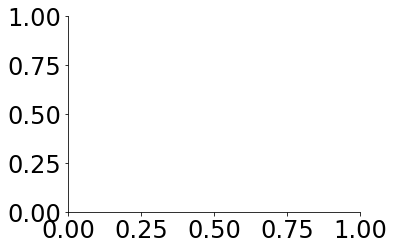

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-dSPN-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability dSPN to dSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [1972.]
Rejected (too large z-depth): 284
P(d<5e-05)=0.2611570247933884
P(d<0.0001)=0.24543610547667344


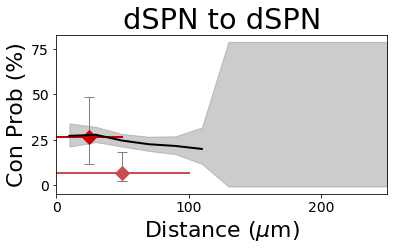

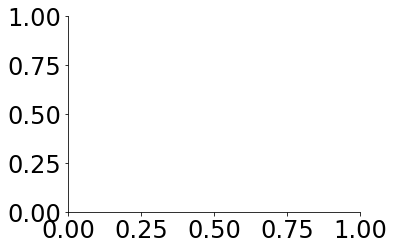

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-dSPN-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability iSPN to dSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [2070.]
Rejected (too large z-depth): 234
P(d<5e-05)=0.25384615384615383
P(d<0.0001)=0.23728813559322035


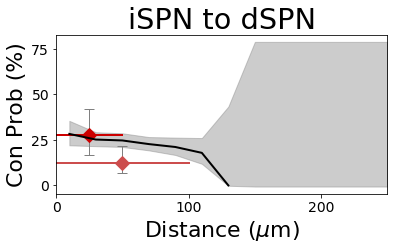

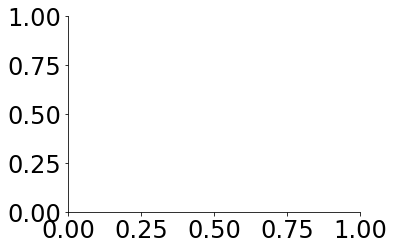

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-iSPN-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability iSPN to iSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [2060.]
Rejected (too large z-depth): 196
P(d<5e-05)=0.329136690647482
P(d<0.0001)=0.30901077375122427


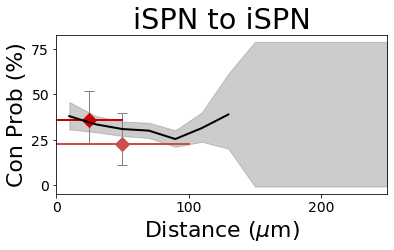

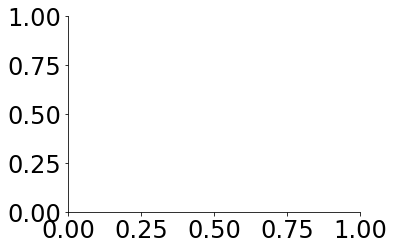

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-iSPN-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability FSN to iSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [39.]
Rejected (too large z-depth): 9
P(d<0.0001)=0.7222222222222222
P(d<0.00015)=0.6923076923076923
P(d<0.00025)=0.6923076923076923


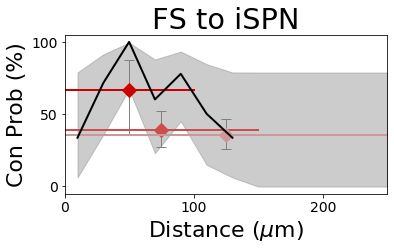

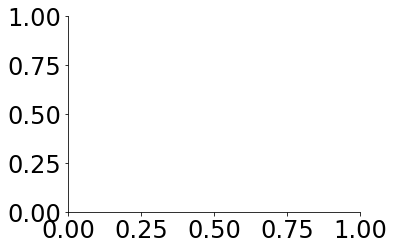

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability FSN to dSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [38.]
Rejected (too large z-depth): 10
P(d<0.0001)=0.8648648648648649
P(d<0.00015)=0.868421052631579
P(d<0.00025)=0.868421052631579


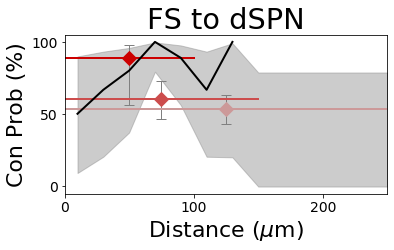

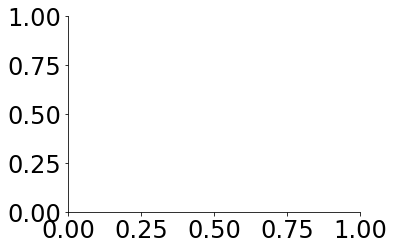

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability FSN to FSN (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [0.]
Rejected (too large z-depth): 0
P(d<0.00025)=0.0


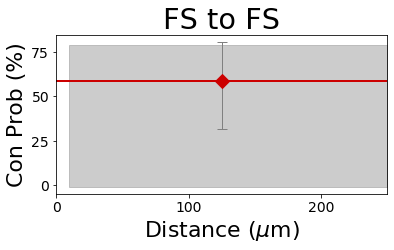

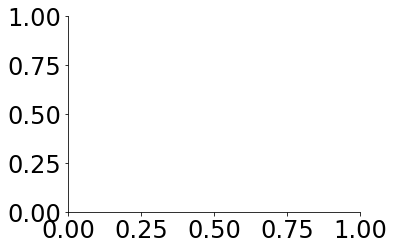

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-FSN-synapses-2D-dist.pdf
Plotting connection probability FSN to FSN (gapjunctions)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [0.]
Rejected (too large z-depth): 0
P(d<0.00025)=0.0
P(d<0.00025)=0.0


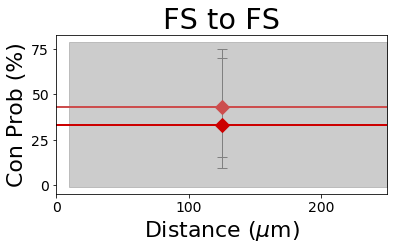

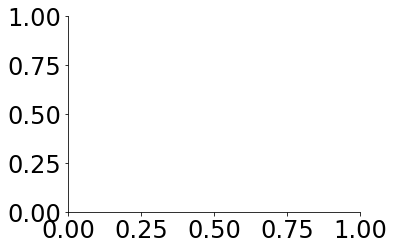

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-FSN-gapjunctions-2D-dist.pdf
Plotting connection probability LTS to dSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [48.]
Rejected (too large z-depth): 0
P(d<0.00025)=0.16666666666666666


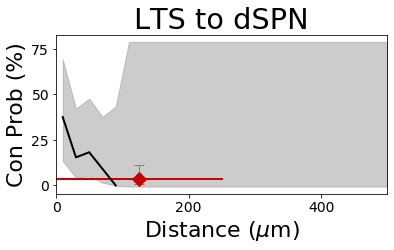

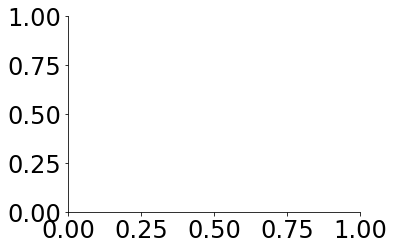

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-LTS-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability LTS to iSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [48.]
Rejected (too large z-depth): 0
P(d<0.00025)=0.020833333333333332


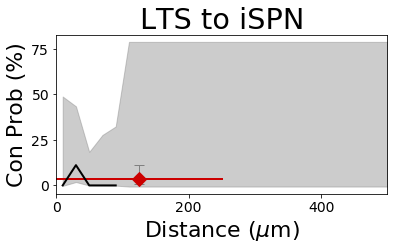

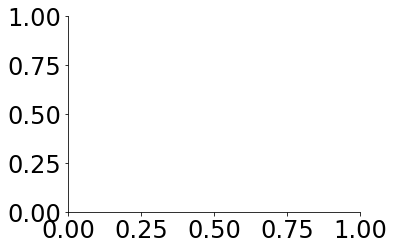

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-LTS-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability FSN to LTS (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [1.]
Rejected (too large z-depth): 0
P(d<0.00025)=0.0


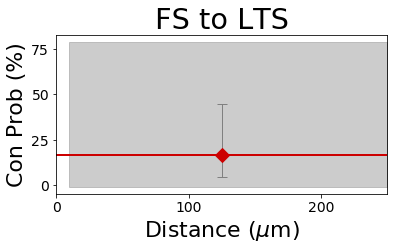

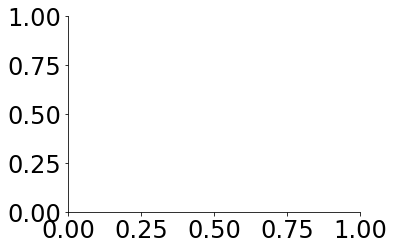

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-LTS-synapses-2D-dist.pdf
Plotting connection probability ChIN to LTS (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [1.]
Rejected (too large z-depth): 0


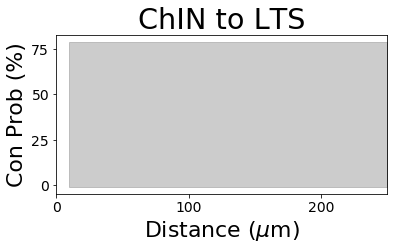

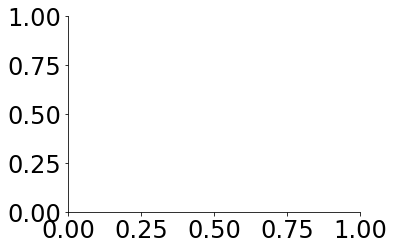

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-LTS-synapses-2D-dist.pdf
Plotting connection probability ChIN to iSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [42.]
Rejected (too large z-depth): 6
P(d<0.00025)=0.0


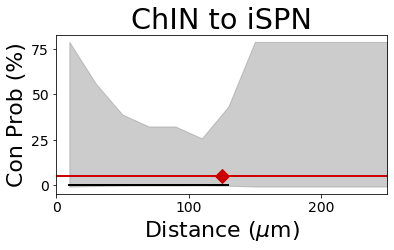

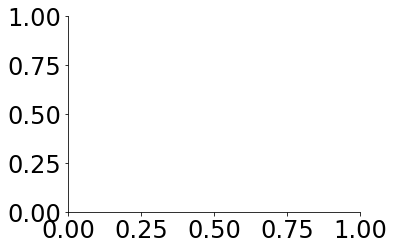

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability ChIN to dSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [38.]
Rejected (too large z-depth): 10
P(d<0.00025)=0.0


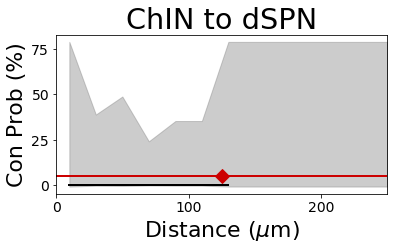

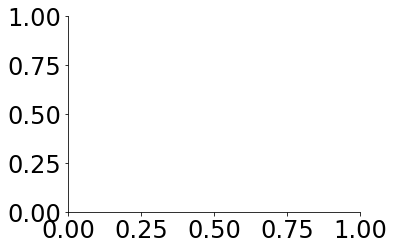

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability LTS to ChIN (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [1.]
Rejected (too large z-depth): 0


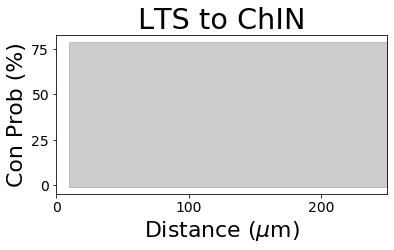

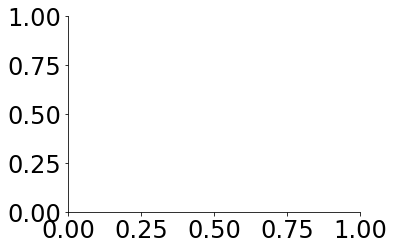

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-LTS-to-ChIN-synapses-2D-dist.pdf
Plotting connection probability ChIN to FSN (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [0.]
Rejected (too large z-depth): 1


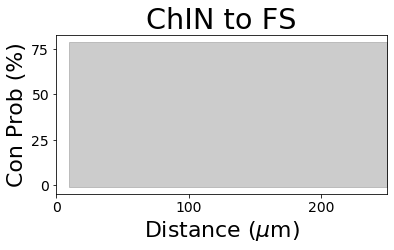

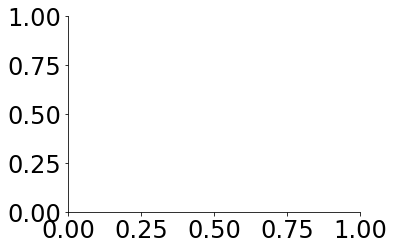

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-FSN-synapses-2D-dist.pdf
Plotting connection probability dSPN to ChIN (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [38.]
Rejected (too large z-depth): 10


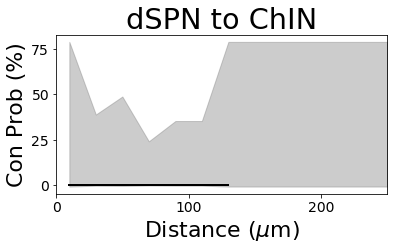

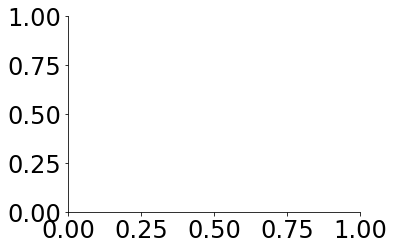

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-dSPN-to-ChIN-synapses-2D-dist.pdf
Plotting connection probability iSPN to ChIN (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [42.]
Rejected (too large z-depth): 6


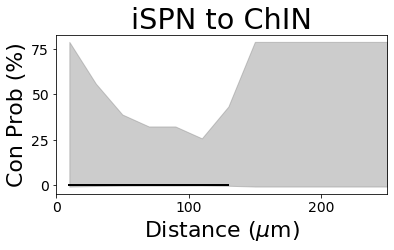

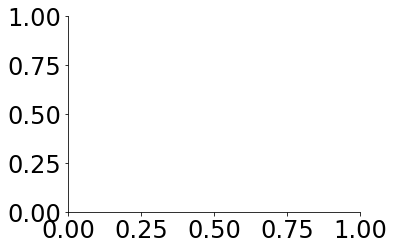

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-iSPN-to-ChIN-synapses-2D-dist.pdf


In [16]:
  from snudda.analyse_striatum import SnuddaAnalyseStriatum
  nas = SnuddaAnalyseStriatum("networks/tinySim",volumeType="cube")
    
  plotHenrike = True
  plotChIN = True
  plotLTS = True

  dist3D = False
  #dist3D = True


  if(plotHenrike):

    yMaxH = None #0.5

    nas.plotConnectionProbability("dSPN","iSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[50e-6,100e-6],\
                                  expData=[3/47.0,3/66.0],
                                  expDataDetailed=[(3,47),(3,66)],
                                  yMax=yMaxH)
    nas.plotConnectionProbability("dSPN","dSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[50e-6,100e-6],\
                                  expData=[5/19.0,3/43.0],
                                  expDataDetailed=[(5,19),(3,43)],
                                  yMax=yMaxH)    
    nas.plotConnectionProbability("iSPN","dSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[50e-6,100e-6],\
                                  expData=[13/47.0,10/80.0],
                                  expDataDetailed=[(13,47),(10,80)],
                                  yMax=yMaxH)
    nas.plotConnectionProbability("iSPN","iSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[50e-6,100e-6],\
                                  expData=[14/39.0,7/31.0],
                                  expDataDetailed=[(14,39),(7,31)],
                                  yMax=yMaxH)


  if(True):

    nas.plotConnectionProbability("FSN","iSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[100e-6, 150e-6, 250e-6],
                                  expData=[6/9.0, 21/54.0, 27/77.0],
                                  expDataDetailed=[(6,9),(21,54),(27,77)],
                                  yMax=None)

    nas.plotConnectionProbability("FSN","dSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[100e-6, 150e-6, 250e-6],
                                  expData=[8/9.0, 29/48.0, 48/90.0],
                                  expDataDetailed=[(8,9),(29,48),(48,90)],
                                  yMax=None)

    
    #  Gittis,...,Kreitzer 2010 (p2228) -- 7/12 (and 3/4 reciprocal) -- distance?
    # FS->FS synapses weaker, 1.1 +/- 1.5nS  
    nas.plotConnectionProbability("FSN","FSN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[250e-6],\
                                  expData=[7/12.0],
                                  expDataDetailed=[(7,12)] )
    
    # Koos & Tepper 1999, 2/6
    nas.plotConnectionProbability("FSN","FSN", \
                                  dist3D=dist3D ,
                                  connectionType="gapjunctions",
                                  expMaxDist=[250e-6,250e-6],
                                  expData=[2/6.0,3/7.0],
                                  expDataDetailed=[(2,6),(3,7)],)



  if(plotLTS):

    # 3/21 LTS->MS, Basal Ganglia book --- distance??
    # Ibanez-Sandoval, ..., Tepper  2011 3/21 -- if patching around visual axon
    # but 2/60 when patching blind
    nas.plotConnectionProbability("LTS","dSPN", \
                                  dist3D=dist3D,
                                  expMaxDist=[250e-6],
                                  expData=[2/60.0],
                                  expDataDetailed=[(2,60)],
                                  xMax=500)

    nas.plotConnectionProbability("LTS","iSPN", \
                                  dist3D=dist3D,
                                  expMaxDist=[250e-6],
                                  expData=[2/60.0],
                                  expDataDetailed=[(2,60)],
                                  xMax=500)

  
    # Silberberg et al 2013, 2/12 FS-> LTS connected --- distance??
    nas.plotConnectionProbability("FSN","LTS", \
                                  dist3D=dist3D,
                                  expMaxDist=[250e-6],
                                  expData=[2.0/12],
                                  expDataDetailed=[(2,12)])

  nas.plotConnectionProbability("ChIN","LTS", \
                                dist3D=dist3D)
  
  # Janicova 2015?? --- distance??!
  nas.plotConnectionProbability("ChIN","iSPN", \
                                dist3D=dist3D,
                                expMaxDist=[250e-6],
                                expData=[0.05])
    
  nas.plotConnectionProbability("ChIN","dSPN", \
                                dist3D=dist3D,
                                expMaxDist=[250e-6],
                                expData=[0.05])
  
  if(True):
    nas.plotConnectionProbability("LTS","ChIN", \
                                  dist3D=dist3D )

  if(plotChIN):    
    nas.plotConnectionProbability("ChIN","FSN", \
                                  dist3D=dist3D,
                                  yMax=None)

    nas.plotConnectionProbability("dSPN","ChIN", \
                                  dist3D=dist3D)
    nas.plotConnectionProbability("iSPN","ChIN", \
                                  dist3D=dist3D)



Simulation analysis plots are saved as PDF files in the directory `networks/tinySim/figures`.

In [17]:
!ls networks/tinySim/figures/*.pdf

networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-FSN-synapses-2D-dist.pdf
networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-LTS-synapses-2D-dist.pdf
networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-dSPN-synapses-2D-dist.pdf
networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-iSPN-synapses-2D-dist.pdf
networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-FSN-gapjunctions-2D-dist.pdf
networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-FSN-synapses-2D-dist.pdf
networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-LTS-synapses-2D-dist.pdf
networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-dSPN-synapses-2D-dist.pdf
networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-iSPN-synapses-2D-dist.pdf
networks/tinySim/figures/

## Closing remarks

This example creates a very small striatal network. Size of the network and other parameters can be adjusted. For more information, please see https://github.com/Hjorthmedh/Snudda/wiki/Developer-Installation-Guide.

Questions and suggestions related to *Snudda* simulations, please address to the main developer, *Johannes Hjorth* [hjorth@kth.se](mailto:hjorth@kth.se).